In [1]:
# importing libraries
import numpy as np
import pandas as pd

In [2]:
# disable warning
pd.options.mode.chained_assignment = None  # default='warn'

In [151]:
# reading the data frame
df1 = pd.read_csv('data_sets/january-2017.csv')
df2 = pd.read_csv('data_sets/february-2017.csv') 
df3 = pd.read_csv('data_sets/march-2017.csv')
df4 = pd.read_csv('data_sets/april-2017.csv') 
df5 = pd.read_csv('data_sets/may-2017.csv') 
df6 = pd.read_csv('data_sets/june-2017.csv') 
df7 = pd.read_csv('data_sets/july-2017.csv') 
df8 = pd.read_csv('data_sets/august-2017.csv') 
df9 = pd.read_csv('data_sets/september-2017.csv') 
df10 = pd.read_csv('data_sets/october-2017.csv') 
df11 = pd.read_csv('data_sets/november-2017.csv') 
df12 = pd.read_csv('data_sets/december-2017.csv') 

In [152]:
# conbine the dataframe into one year
df = pd.concat([df1,df2,df3,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

In [153]:
# Dropping the columns that has more more than 10% of the data missing
for col in df:
    if df[col].isnull().sum() > 933:
        df.drop(col, axis=1, inplace=True)

In [154]:
# Dropping the columns with missing data (only take the sensors with temperature,humidity, pressure, pm1, pm25, and pm 10 )
# create a list of the first 3 digits of the col names
col_front = []
for col in df:
    col_front.append(col[:3])

In [155]:
# see which one has missing cols
pd.value_counts(col_front) < 6
pd.value_counts(col_front).index.tolist()
# create a list of all the sensors with missing columns
to_del = ['196','183', '176','180','184','177','185','181' '201','179','172','147']

In [156]:
# dropping the to_del from df
for col in df:
    if col[:3] in to_del:
        df.drop(col,axis=1,inplace=True)

In [157]:
# see which one is the remaining cols
pd.value_counts(col_front) == 6
pd.value_counts(col_front).index.tolist()
# create a list of the remaining cols
to_add = ['215','226',
 '171',
 '223',
 '208',
 '189',
 '220',
 '170',
 '169',
 '221',
 '219',
 '222',
 '225',
 '202',
 '173',
 '263',
 '212',
 '214',
 '210',
 '192',
 '209',
 '194',
 '218',
 '228',
 '204']

In [158]:
#combine the location to the dataframe
#load location data
locations =pd.read_csv('data_sets/sensor_locations.csv')

In [159]:
# setting the id to index and make it the columns
locations = locations.set_index(keys='id').transpose()

In [160]:
locations = pd.read_csv('data_sets/sensor_locations.csv')

In [161]:
locations = locations.set_index('id')

In [162]:
# creating a dictionary with all the sensors and times, change the columns to be the same, add latitude & long titude
d = {}
for num in to_add:
    d[f"sensor{num}"] = df[['UTC time',f'{num}_temperature',f'{num}_humidity',f'{num}_pressure',f'{num}_pm1',f'{num}_pm25',f'{num}_pm10']]
    d[f'sensor{num}'].columns = ['UTC time', 'temperature', 'humidity', 'pressure', 'pm1','pm25', 'pm10']
    d[f'sensor{num}']['latitude'] = locations.loc[int(num),'latitude']
    d[f'sensor{num}']['longitude'] = locations.loc[int(num),'longitude']

In [163]:
# adding the df together to create one long df
sensor_d_list = []
for num in to_add:
    sensor_d_list.append(d[f'sensor{num}'])
df_r = pd.concat(sensor_d_list)

In [164]:
# fill in the remaining columns with average & create dummies variables for lat and long, convert UTC to date time
# converting UTC to date_time
df_r['UTC time'] = pd.to_datetime(df_r['UTC time'])

# UTC time as the index
df_r.set_index(keys='UTC time', inplace=True)

In [20]:
import seaborn as sns

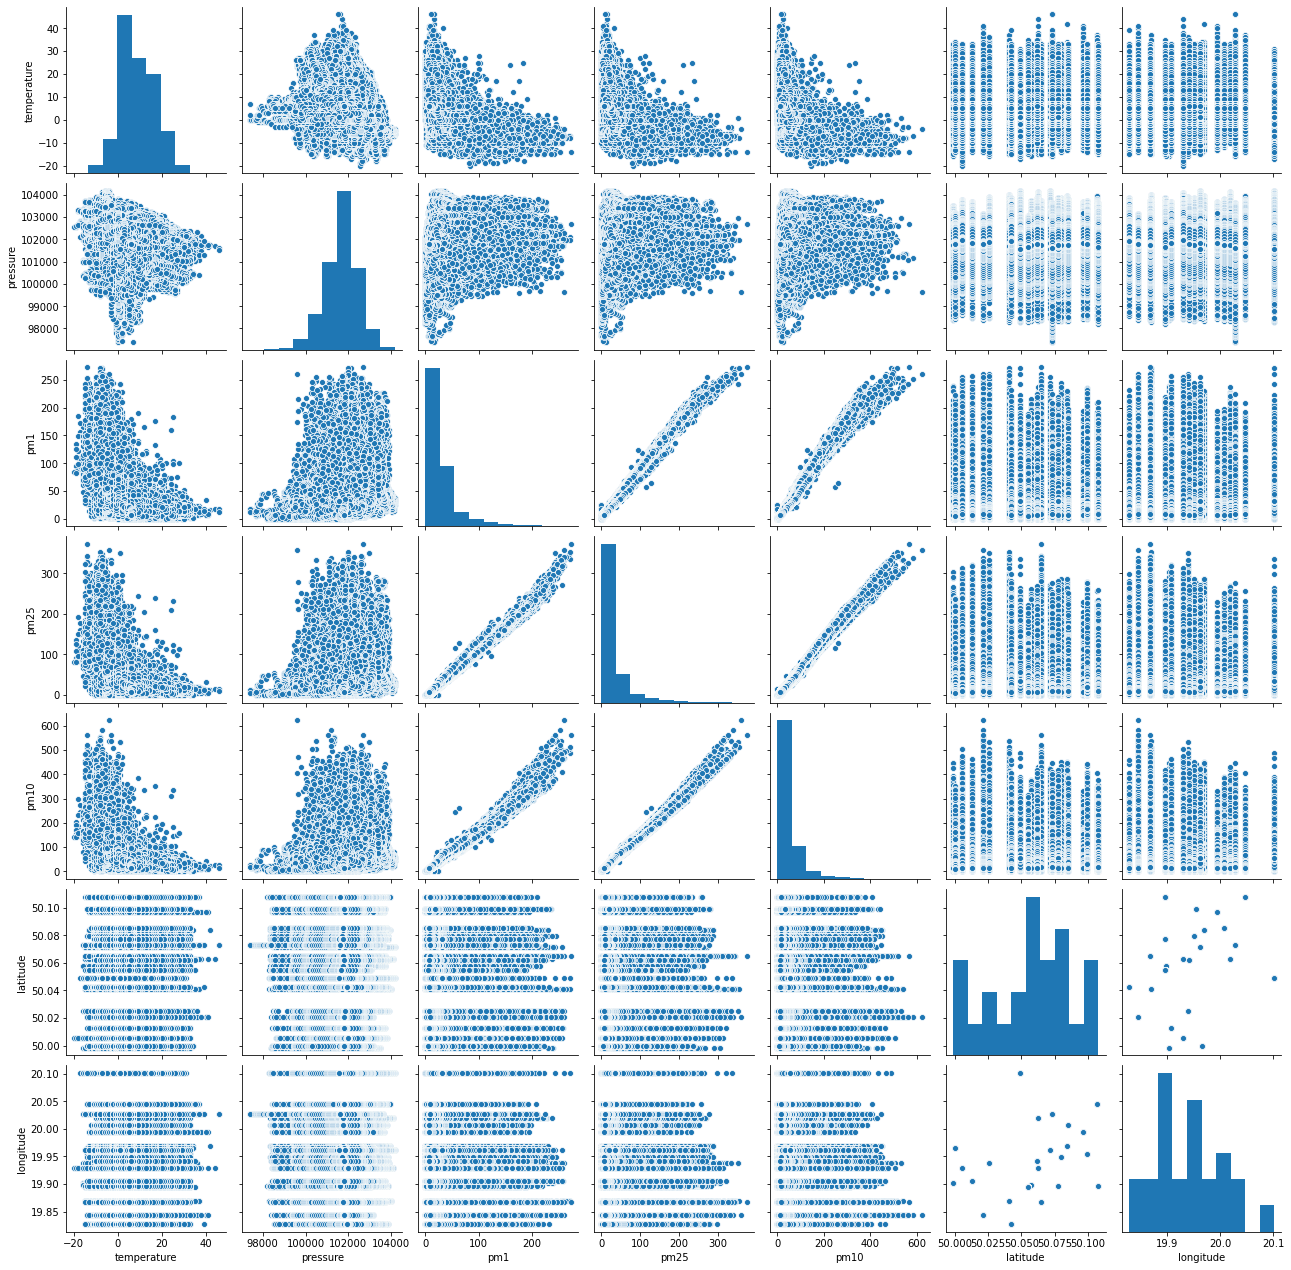

In [169]:
sns.pairplot(df_r)

In [165]:
# the humidity number does not make sense, most of them are high negative. Drop the column
df_r.drop('humidity',axis=1, inplace=True)

In [166]:
# There is a outlier in the pm1 column, deleter that row
df_r.drop(df_r[df_r['pm1'] == df_r['pm1'].max()].index, inplace=True)

In [167]:
# filling in the remaining missing data with the average (average monthly)
for num in range(1,13):
    df_r.loc[f'2017-{num}']= df_r.loc[f'2017-{num}'].fillna(df_r.loc[f'2017-{num}'].mean())

In [170]:
df_r.to_csv('data_sets/for_eda.csv', index=False)